<a href="https://colab.research.google.com/github/cristobalperezp/MDS7202-Laboratorio/blob/main/Lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Laboratorio 8: Aprendizaje Supervisado 🔮</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla y Ignacio Meza
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias y Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Cristóbal Pérez
- Nombre de alumno 2: Patricio Pérez


### **Link de repositorio de GitHub:** `https://github.com/cristobalperezp/MDS7202-Laboratorio/tree/main`

## Temas a tratar

- Aprendizaje Supervisado
- Flujos de datos a través de `Pipelines`.

## Reglas

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

## Objetivos principales del laboratorio

- Comprender el funcionamiento de clasificadores/regresores.
- Generar múltiples modelos predictivos.
- Comprender las ventajas de crear modelos en pipeline vs hacer las operaciones a mano.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre `DataFrames`.

### Importamos librerias utiles 😸

In [248]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split 

# Pre-procesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

# Metricas de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

#Libreria para plotear
#!pip install --upgrade plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

https://www.kaggle.com/antoinekrajnc/soccer-players-statistics

# 1. Predicciones Futboleras

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones. 

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con los csv `statsplayers.csv` y `salarios.pickle`, donde deberán aplicar algoritmos de de aprendizaje supervisado (clasificación y regresión) en base a características que describen de jugadores de futbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [249]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
#try:
#    from google.colab import drive
#    drive.mount("/content/drive")
#    path = 'Dirección donde tiene los archivos en el Drive'
#except: 
#    print('Ignorando conexión drive-colab')

In [250]:
df_players = pd.read_csv('https://raw.githubusercontent.com/cristobalperezp/MDS7202-Laboratorio/main/stats_players.csv')
df_players

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,Sub,183,82,Right,19,Medium / Medium,1,...,27,56,14,16,13,13,11,13,15,12
17584,Dylan McGoey,Republic of Ireland,NaN,Sub,185,80,Right,19,Medium / Medium,2,...,28,53,12,17,12,11,12,13,16,12
17585,Tommy Ouldridge,England,NaN,Res,173,61,Right,18,High / Medium,2,...,54,61,41,44,28,42,35,36,42,37
17586,Mark Foden,Scotland,NaN,Sub,180,80,Right,21,Medium / Medium,3,...,34,48,15,23,14,12,13,12,24,12


In [251]:
#https://raw.githubusercontent.com/cristobalperezp/MDS7202-Laboratorio/main/salarios.csv

## 1.1 Predicción de Seleccionados Nacionales 

Como primera tarea, Renacín, intrigado por la posibilidad de saber qué tan reconocido es un jugador, le consulta a su equipo si es posible predecir si un jugador será o no seleccionado nacional a partir de sus estadísticas en el juego. 

<p align="center">
  <img src="https://thumbs.gfycat.com/ThornyFrankFoxhound-size_restricted.gif" width="500">
</p>

### 1.1.1 Generación de Labels para la Clasificación [Sin Puntaje]


Primero comience generando las labels para la clasificación. Para esto, trabaje sobre el atributo ```National_Position``` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. 

Hecho esto, ¿Cuantos ejemplos por cada clase se tienen? Comente lo que observa.



**Respuesta:**

In [252]:
df_players['Seleccionado'] = ~df_players.loc[:,'National_Position'].isna()*1

In [253]:
df_players['Seleccionado'].value_counts()

Seleccionado
0    16513
1     1075
Name: count, dtype: int64

Asumiendo un equipo de 23 jugadores por equipo, entonces:

In [254]:
1075//23

46

Existirían 46 selecciones nacionales en este dataset, lo que hace sentido considerando una base con 17588 jugadores, daría:

In [255]:
17558//46

381

Casi 381 jugadores seleccionables para cada combinado nacional.

### 1.1.2 Camino a la clasificación [1 punto]

<p align="center">
  <img src="https://c.tenor.com/SoXZJHWnhKAAAAAC/pitbull-medel.gif" width="500">
</p>

Para preprocesar el dataset, genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guardelo en algúna variable.

Luego, comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material ```Player_Stats_Report.html``` que viene en el zip del lab), al igual que las transformaciones aplicadas.

Hecho lo anterior, **defina al menos 3 pipelines para la clasificación**, en donde utilice el mismo ColumnTransformer definido anteriormente, pero que varie entre cada pipeline los clasificadores. 

Para seleccionar los clasificadores más adecuados, utilice la siguiente guía:

<p align="center">
  <img src="https://scikit-learn.org/stable/_static/ml_map.png" width="500">
</p>

<br/>

Con ella, comente y justifique cada una de las decisiones tomadas al momento de desarrollar su pipeline.

**Nota:** Si tiene problemas al utilizar OneHotEncoder puede utilizar el parámetro handle_unknown='ignore'. Esto hace que en la codificación se omitan las categorias que no aparecen en el entrenamiento. Pregunta dudosa (no tiene puntaje), ¿esto tiene sentido a nivel de modelos?.

**To-Do:**

- [ ] Genere un ```ColumnTransformer``` enfocado en preprocesar los datos.
- [ ] Indicar y Justificar que preprocesamiento utiliza sobre cada columna.
- [ ] Crear 3 ``pipelines`` con diferentes clasificadores.
- [ ] Para seleccionar los clasificadores base sus decisiones en la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
- [ ] No entrenar los ``pipelines`` aún.

**Nota:** No es necesario entrenar los clasificadores aún.

In [256]:
df_players.shape

(17588, 40)

In [257]:
df_players.dtypes

Name                 object
Nationality          object
National_Position    object
Club_Position        object
Height                int64
Weight                int64
Preffered_Foot       object
Age                   int64
Work_Rate            object
Weak_foot             int64
Skill_Moves           int64
Ball_Control          int64
Dribbling             int64
Marking               int64
Sliding_Tackle        int64
Standing_Tackle       int64
Aggression            int64
Reactions             int64
Interceptions         int64
Vision                int64
Composure             int64
Crossing              int64
Short_Pass            int64
Long_Pass             int64
Acceleration          int64
Speed                 int64
Stamina               int64
Strength              int64
Balance               int64
Agility               int64
Jumping               int64
Heading               int64
Shot_Power            int64
Finishing             int64
Long_Shots            int64
Curve               

In [258]:
df_players.columns

Index(['Name', 'Nationality', 'National_Position', 'Club_Position', 'Height',
       'Weight', 'Preffered_Foot', 'Age', 'Work_Rate', 'Weak_foot',
       'Skill_Moves', 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Interceptions', 'Vision',
       'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration',
       'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping',
       'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve',
       'Freekick_Accuracy', 'Penalties', 'Volleys', 'Seleccionado'],
      dtype='object')

In [259]:
df_players['Name'].value_counts()

Name
Felipe              6
Danilo              5
Gabriel             5
Carlos Rodríguez    4
Roberto             4
                   ..
Adam Frączczak      1
Renaud Ripart       1
Mateusz Matras      1
Mustafa Saymak      1
Barry Richardson    1
Name: count, Length: 17341, dtype: int64

In [260]:
df_players['Nationality'].value_counts()

Nationality
England       1618
Argentina     1097
Spain         1008
France         974
Brazil         921
              ... 
Mauritius        1
Eritrea          1
Oman             1
Guam             1
San Marino       1
Name: count, Length: 160, dtype: int64

In [261]:
df_players['National_Position'].isna().sum()

16513

In [262]:
df_players.isna().sum()

Name                     0
Nationality              0
National_Position    16513
Club_Position            1
Height                   0
Weight                   0
Preffered_Foot           0
Age                      0
Work_Rate                0
Weak_foot                0
Skill_Moves              0
Ball_Control             0
Dribbling                0
Marking                  0
Sliding_Tackle           0
Standing_Tackle          0
Aggression               0
Reactions                0
Interceptions            0
Vision                   0
Composure                0
Crossing                 0
Short_Pass               0
Long_Pass                0
Acceleration             0
Speed                    0
Stamina                  0
Strength                 0
Balance                  0
Agility                  0
Jumping                  0
Heading                  0
Shot_Power               0
Finishing                0
Long_Shots               0
Curve                    0
Freekick_Accuracy        0
P

In [263]:
numeric = ['Age','Weight','Height','Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Interceptions', 'Vision',
       'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration',
       'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping',
       'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve',
       'Freekick_Accuracy', 'Penalties', 'Volleys']

In [264]:
categoric = ['Preffered_Foot','Work_Rate','Skill_Moves']

In [265]:
ordinal = ['Weak_foot']

In [266]:
not_used = ['Name','Club_Position','Nationality','National_Position','Seleccionado']

In [267]:
from sklearn.preprocessing import OrdinalEncoder

**Respuesta:**

In [268]:
ct = ColumnTransformer(
    [
        ('One Hot',OneHotEncoder(sparse=False, handle_unknown="ignore",drop='if_binary'),categoric),
        ('Ordinal',OrdinalEncoder(),ordinal),
        ('Scaler',MinMaxScaler(),numeric)
    ],
    remainder='passthrough'
)

Se elige un One-Hot Encoder para las variables categóricas 'Preffered_Foot','Work_Rate','Skill_Moves' por presentar comportamiento de categorías, sin orden alguno.

Se elige un Ordinal Encoder para 'Week_foot' ya que esta induce un orden de mejor uso de la pierna débil.

Por último, dada las distribuciones de las variables numéricas, que se asemejan a normales, es que se selecciona un Standard Scaler, para estandarizar estas normales a media 0 y varianza 1.

In [269]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

Siguiendo el gráfico aportado para seleccionar modelos, se tienen menos de 100k ejemplos, por lo que se elige un linear SVC, además, como no son textos los datos, KNN, y por último, se selecciona un ensamble de árboles, seleccionando Random Forest.

In [270]:
clf_linear_svc = Pipeline(steps=[
                      ("preprocessing", ct),
                      ("model",SVC(kernel='linear',random_state=42) )
])

In [271]:
clf_knn = Pipeline(steps=[
                      ("preprocessing", ct),
                      ("model",KNeighborsClassifier() )
])

In [272]:
clf_rf = Pipeline(steps=[
                      ("preprocessing", ct),
                      ("model",RandomForestClassifier(random_state=42) )
])

### 1.1.3 Entrenemos los pipelines [1 punto]

<p align="center">
  <img src="https://i.gifer.com/7Cc8.gif" width="350">
</p>


Ahora, entrene los `pipeline` generados en los pasos anteriores. Para esto, primero separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio).

En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`).


Luego, entrene los pipelines

Una vez entrenado su modelo, evalue su rendimiento a través de diferentes métricas, comentando que significa cada uno de los valores obtenidos. Puede usar la función `classification_report` para corroborar sus resultados.

- ¿Qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional)?
- ¿Podrían mejorarse los resultados?, ¿Cómo?
- ¿Influye la cantidad de ejemplos por clase?

**To-Do**:

- [x] Separar el conjunto de datos en entrenamiento y de prueba.
- [x] Entrenar los `pipelines`.
- [x] Utilizar las métricas para evaluar los modelos generados.


**Respuesta:**

In [273]:
df_players=df_players.dropna(subset='Club_Position')

In [274]:
df_players.isna().sum()

Name                     0
Nationality              0
National_Position    16512
Club_Position            0
Height                   0
Weight                   0
Preffered_Foot           0
Age                      0
Work_Rate                0
Weak_foot                0
Skill_Moves              0
Ball_Control             0
Dribbling                0
Marking                  0
Sliding_Tackle           0
Standing_Tackle          0
Aggression               0
Reactions                0
Interceptions            0
Vision                   0
Composure                0
Crossing                 0
Short_Pass               0
Long_Pass                0
Acceleration             0
Speed                    0
Stamina                  0
Strength                 0
Balance                  0
Agility                  0
Jumping                  0
Heading                  0
Shot_Power               0
Finishing                0
Long_Shots               0
Curve                    0
Freekick_Accuracy        0
P

In [275]:
from sklearn.model_selection import train_test_split

labels = df_players.loc[:, "Seleccionado"]
features = df_players.drop(columns=not_used)

X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.2,random_state=42,stratify=labels)

In [276]:
from sklearn.metrics import confusion_matrix

In [277]:
# Fit
clf_linear_svc.fit(X_train,y_train)

# Predict
y_pred = clf_linear_svc.predict(X_train)

# Resultados
print("Matriz de confusión\n", confusion_matrix(y_pred, y_train))
print(classification_report(y_pred, y_train))
print("\nF1-Score", f1_score(y_pred, y_train).round(2))

C:\Users\patri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Matriz de confusión
 [[13209   860]
 [    0     0]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     14069
           1       0.00      0.00      0.00         0

    accuracy                           0.94     14069
   macro avg       0.50      0.47      0.48     14069
weighted avg       1.00      0.94      0.97     14069


F1-Score 0.0


C:\Users\patri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\patri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\patri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetri

In [278]:
# Predict
y_pred = clf_linear_svc.predict(X_test)

# Resultados
print("Matriz de confusión\n", confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))
print("\nF1-Score", f1_score(y_pred, y_test).round(2))

Matriz de confusión
 [[3303  215]
 [   0    0]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      3518
           1       0.00      0.00      0.00         0

    accuracy                           0.94      3518
   macro avg       0.50      0.47      0.48      3518
weighted avg       1.00      0.94      0.97      3518


F1-Score 0.0


C:\Users\patri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\patri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\patri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetri

In [279]:
# Fit
clf_knn.fit(X_train,y_train)

# Predict
y_pred = clf_knn.predict(X_train)

# Resultados
print("Matriz de confusión\n", confusion_matrix(y_pred, y_train))
print(classification_report(y_pred, y_train))
print("\nF1-Score", f1_score(y_pred, y_train).round(2))

C:\Users\patri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Matriz de confusión
 [[13167   738]
 [   42   122]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     13905
           1       0.14      0.74      0.24       164

    accuracy                           0.94     14069
   macro avg       0.57      0.85      0.60     14069
weighted avg       0.99      0.94      0.96     14069


F1-Score 0.24


In [280]:
# Predict
y_pred = clf_knn.predict(X_test)

# Resultados
print("Matriz de confusión\n", confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))
print("\nF1-Score", f1_score(y_pred, y_test).round(2))

Matriz de confusión
 [[3279  202]
 [  24   13]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      3481
           1       0.06      0.35      0.10        37

    accuracy                           0.94      3518
   macro avg       0.53      0.65      0.53      3518
weighted avg       0.98      0.94      0.96      3518


F1-Score 0.1


In [281]:
# Fit
clf_rf.fit(X_train,y_train)

# Predict
y_pred = clf_rf.predict(X_train)

# Resultados
print("Matriz de confusión\n", confusion_matrix(y_pred, y_train))
print(classification_report(y_pred, y_train))
print("\nF1-Score", f1_score(y_pred, y_train).round(2))

C:\Users\patri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Matriz de confusión
 [[13209     2]
 [    0   858]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13211
           1       1.00      1.00      1.00       858

    accuracy                           1.00     14069
   macro avg       1.00      1.00      1.00     14069
weighted avg       1.00      1.00      1.00     14069


F1-Score 1.0


In [282]:
# Predict
y_pred = clf_rf.predict(X_test)

# Resultados
print("Matriz de confusión\n", confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))
print("\nF1-Score", f1_score(y_pred, y_test).round(2))

Matriz de confusión
 [[3292  195]
 [  11   20]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      3487
           1       0.09      0.65      0.16        31

    accuracy                           0.94      3518
   macro avg       0.54      0.79      0.57      3518
weighted avg       0.99      0.94      0.96      3518


F1-Score 0.16


**Respuesta**:

```
Comente de resultados observados y si es posible mejorar los resultados.
```

Los valores de accuracy significan cuántos ejemplos están siendo bien clasificados, es decir, ejemplos de la calse 0 y 1 bien clasificados sobre el total de ejemplos.
$$Accuracy = \frac{TP+TN}{TP+FN+TN+FP}$$
Precision mide la exactitud de las predicciones positivas del modelo.
$$Precision = \frac{TP}{TP+FP}$$

Recall mide la capacidad del modelo para encontrar todos los ejemplos positivos (si un jugador es seleccionado nacional).
$$Recall = \frac{TP}{TP+FN}$$

F1 score por su lado, es una ponderación entre precision y recall, y comparando modelos bajo esta métrica para la clase positiva, el modelo con mejor rendimiento es Random Forest, con un F1 score de 0.17 en test, notando además, que es el que identifica vmás ejemplos de esta clase, viendo la matriz de confusión (20 jugadores seleccionados).
$$F1-score = \frac{2*precision*recall}{precision+recall}$$

Estos resultados son mejorables aún, considerando que los modelos han sido entrenados con parámetros por defecto, sin validación cruzada, sin una métrica de evaluación a optimizar y con un dataset de entrenamiento desbalanceado, lo que afecta a que el modelo se enfoque en clasificar correctamente más los ejemplos de la clase 0, es decir, quienes no son seleccionados.

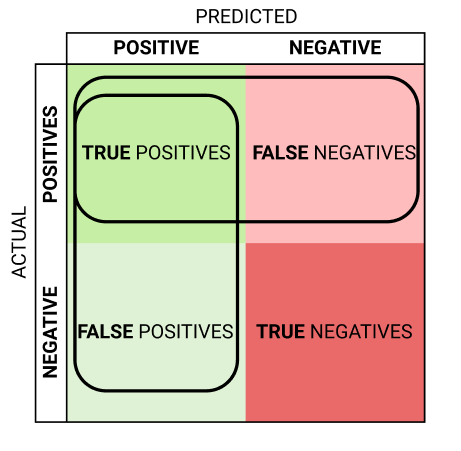

## 1.2 Predicción de posiciones de jugadores [2 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="500">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas. 

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características. 

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo ```Club_Position```, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF'] 
central_ataque = ['RW', 'CAM', 'LW'] 
central = ['RM', 'CM', 'LM'] 
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

Cabe señalar que al igual como lo realizado con la clasificación binaria, deberá justificar en base a la [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) la elección del clasificador y se deben comentar los resultados obtenidos en la clasificación.

**Nota:** Clasifique solamente con las clases señaladas, si observa mas clases eliminelas de la clasficación.

**To-Do**:

- [ ] Aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección.
- [ ] Cuente cuantos por clase quedan.
- [ ] Entrene el nuevo pipeline y ejecute una evaluación de este.  
- [ ] Comente los resultados obtenidos.

**Respuesta:**

In [283]:
position_encoder = {  'ST':'ataque',
           'CF':'ataque',

           'LF':'ataque',
           'RF':'ataque',
           'LS':'ataque',
           'RS':'ataque',

           'RW':'central_ataque',
           'CAM':'central_ataque',
           'LW':'central_ataque',

           'RAM':'central_ataque',
           'LAM':'central_ataque',

           'RM':'central',
           'CM':'central',
           'LM':'central',

           'LCM':'central',
           'RCM':'central',

           'RWB':'central_defensa',
           'CDM':'central_defensa',
           'LWB':'central_defensa',

           'LDM':'central_defensa',
           'RDM':'central_defensa',
           
           'RB':'defensa',
           'CB':'defensa',
           'LB':'defensa',
           
           'RCB':'defensa',
           'LCB':'defensa',

           'GK':'arquero'
}

In [284]:
df_players = df_players.replace({'Club_Position': position_encoder})

In [285]:
df_players['Club_Position'].value_counts()

Club_Position
Sub                7492
Res                3146
defensa            2444
central            1614
ataque              865
central_defensa     741
central_ataque      653
arquero             632
Name: count, dtype: int64

Podemos guardar los players con etiqueta 'Res' o 'Sub' y utilizarlos para predecir su etiqueta normalizada y posteriormente ver algunos ejemplos de jugadores famosos y ver si hace sentido el mejor clasificador.

In [286]:
mask = (df_players.loc[:,'Club_Position']=='Sub') | (df_players.loc[:,'Club_Position']=='Res')
df_res_sub = df_players.loc[mask,:]
df_res_sub

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,Seleccionado
10,Jérôme Boateng,Germany,RCB,Sub,192,90,Right,28,Medium / Medium,4,...,75,86,79,34,58,56,31,46,53,1
58,Claudio Marchisio,Italy,NaN,Sub,180,75,Right,31,High / High,4,...,67,68,82,65,82,78,78,78,76,0
61,Cesc Fàbregas,Spain,NaN,Sub,175,74,Right,29,High / Medium,3,...,68,74,77,76,75,77,81,80,81,0
62,Franck Ribéry,France,NaN,Sub,170,72,Right,33,High / Medium,4,...,50,41,76,76,73,83,81,78,80,0
63,Santi Cazorla,Spain,NaN,Sub,168,66,Right,32,Medium / Medium,5,...,70,58,78,77,82,86,78,80,72,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,Sub,183,82,Right,19,Medium / Medium,1,...,56,14,16,13,13,11,13,15,12,0
17584,Dylan McGoey,Republic of Ireland,NaN,Sub,185,80,Right,19,Medium / Medium,2,...,53,12,17,12,11,12,13,16,12,0
17585,Tommy Ouldridge,England,NaN,Res,173,61,Right,18,High / Medium,2,...,61,41,44,28,42,35,36,42,37,0
17586,Mark Foden,Scotland,NaN,Sub,180,80,Right,21,Medium / Medium,3,...,48,15,23,14,12,13,12,24,12,0


In [287]:
mask = (df_players.loc[:,'Club_Position']=='Sub') | (df_players.loc[:,'Club_Position']=='Res')
df_first = df_players.loc[~mask,:]
df_first

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,Seleccionado
0,Cristiano Ronaldo,Portugal,LS,central_ataque,185,80,Right,32,High / Low,4,...,95,85,92,93,90,81,76,85,88,1
1,Lionel Messi,Argentina,RW,central_ataque,170,72,Left,29,Medium / Medium,4,...,68,71,85,95,88,89,90,74,85,1
2,Neymar,Brazil,LW,central_ataque,174,68,Right,25,High / Medium,5,...,61,62,78,89,77,79,84,81,83,1
3,Luis Suárez,Uruguay,LS,ataque,182,85,Right,30,High / Medium,4,...,69,77,87,94,86,86,84,85,88,1
4,Manuel Neuer,Germany,GK,arquero,193,92,Right,31,Medium / Medium,4,...,78,25,25,13,16,14,11,47,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17310,Tom Bolarinwa,England,NaN,central,180,80,Right,26,Medium / Medium,3,...,54,22,38,37,37,37,32,29,29,0
17312,Zak Mills,England,NaN,defensa,182,83,Right,24,Medium / Medium,4,...,61,43,22,24,28,30,32,39,31,0
17442,Wataru Hashimoto,Japan,NaN,defensa,181,72,Left,30,Medium / High,2,...,71,41,29,26,26,25,25,31,29,0
17461,Callum Cooke,England,NaN,central,172,72,Right,20,Medium / Medium,3,...,63,57,48,50,54,42,33,69,40,0


In [288]:
labels = df_first.loc[:, "Club_Position"]
features = df_first.drop(columns=not_used)

X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.2,random_state=42,stratify=labels)

In [289]:
# Fit
clf_linear_svc.fit(X_train,y_train)

# Predict
y_pred = clf_linear_svc.predict(X_train)

# Resultados
print("Matriz de confusión\n", confusion_matrix(y_pred, y_train))
print(classification_report(y_pred, y_train))
#print("\nF1-Score", f1_score(y_pred, y_train).round(2))

C:\Users\patri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Matriz de confusión
 [[ 506    0    0    0    0    0]
 [   0  583   74   62    0    1]
 [   0   77  861  291  197   62]
 [   0   32  126  154    5    0]
 [   0    0  125   10  241   31]
 [   0    0  105    5  150 1861]]
                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       506
         ataque       0.84      0.81      0.83       720
        central       0.67      0.58      0.62      1488
 central_ataque       0.30      0.49      0.37       317
central_defensa       0.41      0.59      0.48       407
        defensa       0.95      0.88      0.91      2121

       accuracy                           0.76      5559
      macro avg       0.69      0.72      0.70      5559
   weighted avg       0.79      0.76      0.77      5559



In [290]:
# Predict
y_pred = clf_linear_svc.predict(X_test)

# Resultados
print("Matriz de confusión\n", confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))
#print("\nF1-Score", f1_score(y_pred, y_test).round(2))

Matriz de confusión
 [[126   0   0   0   0   0]
 [  0 140  10  22   0   0]
 [  0  24 211  77  55  10]
 [  0   8  38  30   0   0]
 [  0   0  33   1  54   6]
 [  0   1  31   1  39 473]]
                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       126
         ataque       0.81      0.81      0.81       172
        central       0.65      0.56      0.60       377
 central_ataque       0.23      0.39      0.29        76
central_defensa       0.36      0.57      0.45        94
        defensa       0.97      0.87      0.91       545

       accuracy                           0.74      1390
      macro avg       0.67      0.70      0.68      1390
   weighted avg       0.78      0.74      0.76      1390



In [291]:
# Fit
clf_knn.fit(X_train,y_train)

# Predict
y_pred = clf_knn.predict(X_train)

# Resultados
print("Matriz de confusión\n", confusion_matrix(y_pred, y_train))
print(classification_report(y_pred, y_train))
#print("\nF1-Score", f1_score(y_pred, y_train).round(2))

C:\Users\patri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Matriz de confusión
 [[ 506    0    0    0    0    0]
 [   0  590   96   78    3    4]
 [   0   76  956  240  178  103]
 [   0   21   67  178    8    0]
 [   0    2   75   14  279   61]
 [   0    3   97   12  125 1787]]
                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       506
         ataque       0.85      0.77      0.81       771
        central       0.74      0.62      0.67      1553
 central_ataque       0.34      0.65      0.45       274
central_defensa       0.47      0.65      0.54       431
        defensa       0.91      0.88      0.90      2024

       accuracy                           0.77      5559
      macro avg       0.72      0.76      0.73      5559
   weighted avg       0.80      0.77      0.78      5559



In [292]:
# Predict
y_pred = clf_knn.predict(X_test)

# Resultados
print("Matriz de confusión\n", confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))
#print("\nF1-Score", f1_score(y_pred, y_test).round(2))

Matriz de confusión
 [[126   0   0   0   0   0]
 [  0 128  27  36   3   1]
 [  0  35 202  71  54  24]
 [  0   9  25  19   2   1]
 [  0   0  34   2  52  25]
 [  0   1  35   3  37 438]]
                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       126
         ataque       0.74      0.66      0.70       195
        central       0.63      0.52      0.57       386
 central_ataque       0.15      0.34      0.20        56
central_defensa       0.35      0.46      0.40       113
        defensa       0.90      0.85      0.87       514

       accuracy                           0.69      1390
      macro avg       0.63      0.64      0.62      1390
   weighted avg       0.73      0.69      0.71      1390



In [293]:
# Fit
clf_rf.fit(X_train,y_train)

# Predict
y_pred = clf_rf.predict(X_train)

# Resultados
print("Matriz de confusión\n", confusion_matrix(y_pred, y_train))
print(classification_report(y_pred, y_train))
#print("\nF1-Score", f1_score(y_pred, y_train).round(2))

C:\Users\patri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Matriz de confusión
 [[ 506    0    0    0    0    0]
 [   0  692    0    0    0    0]
 [   0    0 1291    0    0    0]
 [   0    0    0  522    0    0]
 [   0    0    0    0  593    0]
 [   0    0    0    0    0 1955]]
                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       506
         ataque       1.00      1.00      1.00       692
        central       1.00      1.00      1.00      1291
 central_ataque       1.00      1.00      1.00       522
central_defensa       1.00      1.00      1.00       593
        defensa       1.00      1.00      1.00      1955

       accuracy                           1.00      5559
      macro avg       1.00      1.00      1.00      5559
   weighted avg       1.00      1.00      1.00      5559



In [294]:
# Predict
y_pred = clf_rf.predict(X_test)

# Resultados
print("Matriz de confusión\n", confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))
#print("\nF1-Score", f1_score(y_pred, y_test).round(2))

Matriz de confusión
 [[126   0   0   0   0   0]
 [  0 140   9  18   0   0]
 [  0  24 232  83  53   8]
 [  0   8  20  26   0   0]
 [  0   0  23   2  48   5]
 [  0   1  39   2  47 476]]
                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       126
         ataque       0.81      0.84      0.82       167
        central       0.72      0.58      0.64       400
 central_ataque       0.20      0.48      0.28        54
central_defensa       0.32      0.62      0.42        78
        defensa       0.97      0.84      0.90       565

       accuracy                           0.75      1390
      macro avg       0.67      0.73      0.68      1390
   weighted avg       0.82      0.75      0.78      1390



In [295]:
X_rs = df_res_sub.drop(columns=not_used)

y_pred = clf_rf.predict(X_rs)

In [296]:
df_res_sub.loc[:,'Predicted_Club_Position'] = y_pred

C:\Users\patri\AppData\Local\Temp\ipykernel_9208\3844284264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res_sub.loc[:,'Predicted_Club_Position'] = y_pred


In [297]:
df_res_sub.loc[:,['Name','Predicted_Club_Position']].head(20)

,Name,Predicted_Club_Position
10,Jérôme Boateng,defensa
58,Claudio Marchisio,central
61,Cesc Fàbregas,central
62,Franck Ribéry,central_ataque
63,Santi Cazorla,central_ataque
64,Andrea Barzagli,defensa
70,İlkay Gündoğan,central_defensa
72,Willian,central
74,Juan Mata,central_ataque
84,Vincent Kompany,defensa


👍

**Respuesta**:

```
Comente de resultados observados y si es posible mejorar los resultados.
```

Los resultados son bastante buenos, los modelos knn y svc lineal presentan un weighted average accuracy de 0.76 y de 0.78 respectivamente en en el set de testeo, mientras que en el random forest uno de 0.81. Esto se debe a que los modelos knn y svc lineal son modelos que se basan en la distancia entre los puntos, mientras que el modelo random forest es un modelo que se basa en la creación de árboles de decisión aleatorios y despues agregados, por lo que es más robusto a los outliers. 

Se puede mejorar los resultados ya que vimos que las clases no están bien distribuidas y esto puede afectar el desempeño de los modelos. Se puede utilizar un método de oversampling para balancear las clases y ver si mejora el desempeño de los modelos. 

Además aplicando el modelo entrenado con jugadores conocidos que tenian etiqueta res (lesionado) o sub (suplente) podemos ver que funciona bien, vemos que Boateng es defensa, Cazorla central Ataque, Dani Alves defensa, etc.

## 1.3 Predicción de Sueldos [2 puntos]

<p align="center">
  <img src="https://media.giphy.com/media/3oEjHWtHAFcOKS4iA0/giphy.gif" width="460">
</p>

Queriendo ahondar aún más en el mercado del balompíe, Renacin, logra obtener (de una manera no muy formal) los sueldos de múltiples futbolistas y los guarda en el archivo ```sueldos.csv```. Con ellos les solicita que generen un regresor que les permita predecir el sueldo de los futbolistas en base a las características de los pichichis, esto, debido a su motivación por invertir y/o realizar especulación sobre los sueldos de jugadores.

Renacin es claro señalando que deben seguir utilizando la [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y comenten cada uno de los pasos realizados, para obtener su regresión lineal. Señalándoles que no aceptara un $R^2$ inferior a 0.35 para el modelo solicitado.

Para esta parte usted tiene total libertad en la generación del regresor, la unica exigencia es que utilice un pipeline para generar la regresión y utilice la metrica $R^2$ para medir el rendimiento de esta.

**To-Do**:

- [X] Explique en que consiste la métrica $R^2$
- [x] Generar un pipeline para la regresión.
- [x] Obtener un regresor con un $R^2$ superior a  $0.35$.
- [x] Comente sus resultados y si es posible mejorar los resultados obtenidos. ¿Se necesitarían más datos o otros tipos de características o una combinación de ambos?

**Respuesta**

La metrica $R^2$ es una medida de que tan bien se ajusta el modelo a los datos, es decir, que tan bien se ajusta la linea de regresión a los datos.

 Un valor de $R^2$ igual a 0 significa que el modelo de regresión no explica ninguna de la variabilidad de la variable de respuesta alrededor de su media. En otras palabras, el modelo no se ajusta a los datos en absoluto. Un valor de $R^2$ igual a 1 significa que el modelo de regresión explica toda la variabilidad de la variable de respuesta alrededor de su media. En otras palabras, el modelo se ajusta perfectamente a los datos.

Se calcula como:

$R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}}$


Donde:

$SS_{\text{res}}$ es la suma de los cuadrados residuales. Esta cantidad se calcula como la suma de los cuadrados de las diferencias entre las respuestas observadas y las respuestas predichas por el modelo.

$SS_{\text{res}} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

$SS_{\text{tot}}$ es la suma total de los cuadrados. Esta cantidad se calcula como la suma de los cuadrados de las diferencias entre las respuestas observadas y su media.

$SS_{\text{tot}} = \sum_{i=1}^{n} (y_i - \bar{y})^2$

Aquí, $y_i$ representa cada valor observado, $\hat{y}_i$ representa cada valor predicho por el modelo, y $\bar{y}$ representa la media de los valores observados. La sumatoria se realiza sobre todos los puntos de datos, de $i=1$ hasta $n$, siendo $n$ el número total de observaciones.








Es importante mencionar que un $R^2$ alto no garantiza que el modelo sea bueno para hacer predicciones en nuevos datos. Un valor de $R^2$ alto podría ser el resultado de un sobreajuste del modelo a los datos de entrenamiento. Por lo tanto, es importante evaluar el rendimiento del modelo en un conjunto de datos de prueba que no se hayan utilizado para entrenar el modelo (set de testeo).



In [298]:
#importamos salarios
df_salarios = pd.read_csv('https://raw.githubusercontent.com/cristobalperezp/MDS7202-Laboratorio/main/salarios.csv')

In [314]:
df_players.shape[0], df_salarios.shape[0]

(17587, 2534)

Datos estan incompletos.

In [299]:
df_salarios.head()

,Unnamed: 0,Player,Weekly Salary
0,1528,Lionel Messi,1538905.0
1,1006,Cristiano Ronaldo,1248536.0
2,1529,Antoine Griezmann,997032.0
3,2004,Neymar,797726.0
4,1530,Gareth Bale,607706.0


In [300]:
df_salarios.drop(columns=['Unnamed: 0'], inplace=True)

In [301]:
#cruzar salarios con jugadores en df_players Name y en df_salarios Player
df_players_salarios = df_salarios.merge(df_players, left_on='Player', right_on='Name')

In [302]:
df_players_salarios.head()

,Player,Weekly Salary,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,...,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,Seleccionado
0,Lionel Messi,1538905.0,Lionel Messi,Argentina,RW,central_ataque,170,72,Left,29,...,68,71,85,95,88,89,90,74,85,1
1,Cristiano Ronaldo,1248536.0,Cristiano Ronaldo,Portugal,LS,central_ataque,185,80,Right,32,...,95,85,92,93,90,81,76,85,88,1
2,Antoine Griezmann,997032.0,Antoine Griezmann,France,CAM,ataque,176,67,Left,26,...,87,80,81,88,82,84,75,71,87,1
3,Neymar,797726.0,Neymar,Brazil,LW,central_ataque,174,68,Right,25,...,61,62,78,89,77,79,84,81,83,1
4,Gareth Bale,607706.0,Gareth Bale,Wales,RS,central_ataque,183,74,Left,27,...,85,86,91,87,90,86,85,76,76,1


In [303]:
df_players_salarios.drop(columns=['Player'], inplace=True)

In [304]:
df_players_salarios.shape

(1866, 41)

Siguiendo la guía de Renacín, tenemos 1866 filas y muchas variables, por lo que probaremos con Ridge Regression.

In [305]:
from sklearn.linear_model import Ridge

numeric = ['Age','Weight','Height','Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
           'Standing_Tackle', 'Aggression', 'Reactions', 'Interceptions', 'Vision',
           'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration',
           'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping',
           'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve',
           'Freekick_Accuracy', 'Penalties', 'Volleys']

categoric = ['Preffered_Foot','Work_Rate','Club_Position','Seleccionado']
ordinal = ['Weak_foot','Skill_Moves']
not_used = ['Name','National_Position','Nationality']

ct = ColumnTransformer(
    [
        ('One Hot',OneHotEncoder(sparse=False, handle_unknown="ignore",drop='if_binary'),categoric),
        ('Ordinal',OrdinalEncoder(),ordinal),
        ('Scaler',MinMaxScaler(),numeric)
    ],
    remainder='passthrough'
)

Ridge_reg = Pipeline(steps=[
                      ("preprocessing", ct),
                      ("model", Ridge())
])

In [306]:
from sklearn.metrics import r2_score

# 'Weekly_Salary' es la columna que queremos predecir
labels = df_players_salarios.loc[:, "Weekly Salary"]
features = df_players_salarios.drop(columns=not_used + ['Weekly Salary'])  # No olvidar eliminar 'Weekly_Salary' de las características

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Fit
Ridge_reg.fit(X_train, y_train)

# Predict
y_train_pred = Ridge_reg.predict(X_train)
y_test_pred = Ridge_reg.predict(X_test)

# Resultados
print("R^2 en train:", r2_score(y_train, y_train_pred))
print("R^2 en test:", r2_score(y_test, y_test_pred))

R^2 en train: 0.35065400282507053
R^2 en test: 0.18812411195425205


C:\Users\patri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\patri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


No funciona muy bien, seguimos con la guia con un ensemble regressor. 

In [308]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = Pipeline(steps=[
                      ("preprocessing", ct),
                      ("model", RandomForestRegressor(random_state=42))
])

# Fit
rf_reg.fit(X_train, y_train)

# Predict
y_train_pred = rf_reg.predict(X_train)
y_test_pred = rf_reg.predict(X_test)

# Resultados
print("R^2 en train:", r2_score(y_train, y_train_pred))
print("R^2 en test:", r2_score(y_test, y_test_pred))



C:\Users\patri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R^2 en train: 0.9519776957065009
R^2 en test: 0.3638797567442509


C:\Users\patri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


**Respuesta**:

```
Comente de resultados observados y si es posible mejorar los resultados.
```

El modelo de regresión de random forest logra llegar a un $R^2$ de 0.36 en el set de prueba, en este caso funciona mejor que la regresión Ridge que tiene un $R^2$ de 0.18. Esto puede ser porque los bosques aleatorios son capaces de modelar relaciones no lineales y de alta dimensión entre las características, mientras que la regresión Ridge es un modelo lineal que asume una relación lineal entre las características y la variable objetivo. Si las verdaderas relaciones en los datos son de hecho no lineales, los modelos basados en árboles como el bosque aleatorio podrían capturar estas relaciones mejor que los modelos lineales como Ridge.

Además, los bosques aleatorios pueden ser más robustos a la multicolinealidad (cuando dos o más características están altamente correlacionadas) debido a su enfoque de ensemble y su naturaleza no paramétrica. En cambio, los modelos de regresión lineal como Ridge pueden verse afectados negativamente por la multicolinealidad, lo que puede disminuir su rendimiento.

Si es posible mejorar el rendimiento del modelo, una forma sería agregando mas datos, ya que la base de jugadores y de salarios tienen 17587 y 2534 filas respectivamente, y al cruzar por nombres en total quedan 1866 filas. Otra forma sería agregar mas caracteristicas, por ejemplo, los stats de los jugadores en los partidos, como la cantidad de goles, asistencias, minutos jugados en temporada, etc. Aunque una combinación de ambas sería lo ideal.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media2.giphy.com/media/l1J3CbFgn5o7DGRuE/giphy.gif">
</p>

<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>